(d_understand_crs_codes)=

# Understanding a CRS: Proj4 and CRS codes
----------------

```{admonition} Learning Objectives
* Understand how to read a `PROJ.4` string
* Understand how a `PROJ.4` string relates to an `EPSG` code
* Visually explore changing `PROJ.4` string parameters
```
```{admonition} Review
* [CRS what is it?](d_crs_what_is_it.md)
```
----------------

By: Steven Chao

---------------

## Intro to Coordinate Reference Systems


A coordinate reference system tells Python where and how to place coordinates on Earth's surface. For a detailed lesson on projections please go [here](d_crs_what_is_it).

As you may recall, a coordinate reference system can either be a geographic coordinate system or a projected coordinate system (also known as a map projection). A geographic coordinate system consists of a datum, which consists of an ellipsoid model and how this ellipsoid is aligned with the geoid. It's spherical in nature, and units are typically angular (latitude and longitude). A projected coordinate system is created by taking a geographic coordinate system and using math to transform a 3-D surface onto a flat, 2-D surface. Units are typically linear and are oftentimes measured in meters. For a refresher on coordinate systems, check out this [YouTube video](https://youtu.be/HnWNhyxyUHg).

All map projections introduce error because they are inherently imperfect. The "best" or "perfect" projection to use is highly dependent on what needs to be mapped and where. Therefore, as you can expect, there are many projections to choose from.


---

In this chapter, we will check, utilize, change, and create CRSs in Python. To provide visual examples along the way, we will use a shapefile of the Washington, DC, boundary from Open Data DC (https://opendata.dc.gov/datasets/washington-dc-boundary).

Let's begin by reading in this dataset (no need to download the shapefile as we will pull it directly from the website).

In [1]:
# Import module
import geopandas as gpd

# Read data (shapefile)
dc = gpd.read_file("https://opendata.arcgis.com/datasets/7241f6d500b44288ad983f0942b39663_10.geojson")

Let's also define a function that will allow us to quickly produce a map of our data.

In [2]:
# Import module
import matplotlib.pyplot as plt

def map_data(data, header):
    '''Function superimposes all the data on a map and sets a title for the map.'''    
    
    # Create subplots
    fig, ax = plt.subplots(figsize = (10, 5))
    
    # Set colors
    colors = ["#a3ddcb", "#03506f"]
    
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = colors[i], ax = ax)
    
    # Add title
    plt.title(header)
    
    # Utilize BMH plotting style
    plt.style.use("bmh")
    
    # Remove empty white space around the plot
    plt.tight_layout()

Now, we can see how the shapefile we just read in looks like.

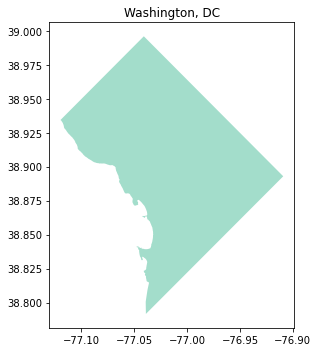

In [3]:
# Create map using DC shapefile
map_data([dc], "Washington, DC")

It looks like Washington, DC, albeit a bit squished! Next, let's see how we can work with CRSs in Python.



## Checking and Setting Coordinate Reference Systems in Python

### Checking a dataset's coordinate reference system

To check the dataset's CRS (assuming it has one), use the `.crs` attribute.

In [4]:
# Get CRS for DC shapefile
print("CRS: {}".format(dc.crs))

CRS: epsg:4326


For our shapefile, the output is a dictionary with a value of `'epsg:4326'`. We'll cover what this means in more detail later in this chapter, but just know for now that an `EPSG` code is a way to reference a CRS.



### Change a dataset's CRS

To change a dataset's CRS, we'll need to reproject the data. Here, we will project copies of our data twice using the `to_crs()` function, once with a `PROJ.4` string and once with an `EPSG` code. Both of these values reference the same CRS (in this case, NAD83)--they are simply different ways to reference it. The projection will remain in latitude and longitude, but we will change the ellipsoid and datum.

In [5]:
# Example 1: Create a copy of the DC shapefile
dc_reproject_proj4 = dc.copy()

# Example 1: Reproject the data to NAD83 using PROJ.4 string
# Source: https://spatialreference.org/ref/epsg/nad83/
dc_reproject_proj4 = dc_reproject_proj4.to_crs("+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs")


# Example 2: Create a copy of the DC shapefile
dc_reproject_epsg = dc.copy()

# Example 2: Reproject the data to NAD83 using EPSG code
dc_reproject_epsg = dc_reproject_epsg.to_crs(epsg=4269)

There are some other formats we can pass as values, but we'll cover `PROJ.4` string and `EPSG` in this chapter.

When we call the `.crs` attribute, it's no longer `'epsg:4326'`, which means that the data has been reprojected!

In [6]:
# Example 1: Print new CRS of DC
print("Example 1 (PROJ.4 string) CRS: {}".format(dc_reproject_proj4.crs))

# Example 2: Print new CRS of DC
print("Example 2 (EPSG code) CRS: {}".format(dc_reproject_epsg.crs))

Example 1 (PROJ.4 string) CRS: +proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs +type=crs
Example 2 (EPSG code) CRS: epsg:4269


## PROJ.4 String

A `PROJ.4` string identifies and defines a particular CRS. The string holds the parameters (e.g., units, datum) of a given CRS.

Sources: [Using PROJ](https://proj.org/usage/quickstart.html); [Lesson 4. Understand EPSG, WKT and Other CRS Definition Styles, Leah Wasser](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/)


### What is in a PROJ.4 string?

Multiple parameters are needed in the string to describe a CRS. To separate the parameters in the string and identify each individual parameter, each parameter begins with a `+` sign. A CRS parameter is defined after the `+` sign.

A few `PROJ.4` parameters can be applied to most CRSs:

| Parameter | Description |
| ----------- | ------------------------------- |
| `+a` | Semimajor radius of the ellipsoid axis |
| `+axis` | Axis orientation |
| `+b` | Semiminor radius of the ellipsoid axis |
| `+ellps` | Ellipsoid name |
| `+k_0` | Scaling factor |
| `+lat_0` | Latitude of origin |
| `+lat_1 or 2` | Standard parallels |
| `+lon_0` | Central meridian |
| `+lon_wrap` | Center longitude to use for wrapping |
| `+over` | Allow longitude output outside -180 to 180 range, disables wrapping |
| `+pm` | Alternate prime meridian (typically a city name) |
| `+proj` | Projection name |
| `+units` | meters, US survey feet, etc. |
| `+vunits` | vertical units |
| `+x_0` | False easting |
| `+y_0` | False northing |

Some parameters (not listed above) are specific to certain CRSs. Be sure to always verify the parameters that are allowed for each projection. You can't always "mix and match" the `PROJ.4` parameters when creating a custom projection.


These parameters can be confusing. To help with this we developed some visual examples. 

Take for instance lambert conformal conic with the proj4 string of "+proj=lcc +lat_1=20 +lat_2=60 lon_0=-96 +datum=NAD83 +units=m". We can see that `lat_1` and `lat_2` specify the standard parallels. This is an example of a "secant" projection which touches the globe in two places in order to minimize distortion.  The central meridian `lon_0` is moved away from Greenwich England 96 degrees W to be over roughly Dallas TX. 

```{figure} ../_static/d_crs/d_LambertProj_Code.png
:name: Visualization of lambert conformal conic Proj4 string
Visualization of lambert conformal conic Proj4 string
```

We can look at another example for a UTM projection with the proj4 string of "+proj=tmerc +lon_0=-99 +x_0=500,000 units=m". This projection by comparison has a central meridian `lon_0` directly over Dallas TX which is 99 degrees W of Greenwich. This central meridan is assigned the 'false easting' `x_0` of 500,000 meters.  

```{figure} ../_static/d_crs/d_MercatorProj_Code.png
:name: Visualization of UTM zone 14 Proj4 string
Visualization of UTM zone 14 Proj4 string
```

Sources: [Cartographic projection](https://proj.org/usage/projections.html); [Using PROJ](https://proj.org/usage/quickstart.html); [Lesson 4. Understand EPSG, WKT and Other CRS Definition Styles, Leah Wasser](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/)


### Creating a custom CRS using PROJ.4 string

We can change the parameters to create a custom CRS that suits our specific needs. In this section, we will create a CRS tailored to our DC shapefile.

Below is the original shapefile of DC that we read in above--this will serve as a reference point for comparison.

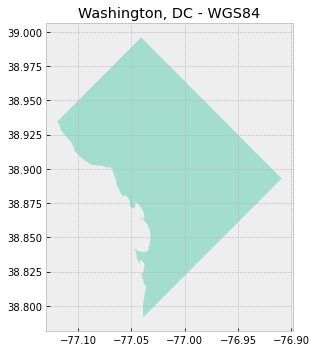

In [7]:
# Map original DC shapefile
map_data([dc], "Washington, DC - WGS84")

The map above utilizes a geographic coordinate system, as evidenced by the latitude and longitude values on the axes. Another way to check is to look at the geometry of the shapefile.

In [8]:
# Check geometry values of original shapefile
print("Geometry of shapefile:\n{}".format(dc['geometry'].head()))

Geometry of shapefile:
0    POLYGON ((-77.11980 38.93435, -77.11979 38.934...
Name: geometry, dtype: geometry


Looks like latitude and longitude coordinates!

#### Reprojecting shapefile to a projected coordinate system

Now, we will reproject the shapefile using a projected coordinate system. Here, we will use the Lambert Conformal Conic projection.

Geometry of shapefile:
0    POLYGON ((1106986.814 4694966.592, 1106987.032...
Name: geometry, dtype: geometry


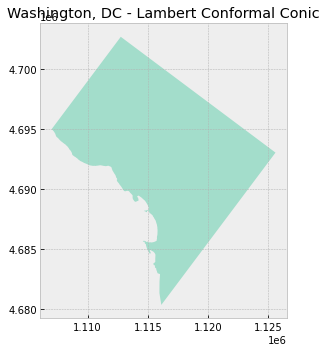

In [9]:
# Create a copy of the DC shapefile
dc_lcc = dc.copy()

# Reproject the data to Lambert Conformal Conic
# Source: https://proj.org/operations/projections/lcc.html
dc_lcc = dc_lcc.to_crs("+proj=lcc +lon_0=-90 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc], "Washington, DC - Lambert Conformal Conic")

# Check geometry values
print("Geometry of shapefile:\n{}".format(dc_lcc['geometry'].head()))

Notice how the values on the axes changed from latitude and longitude to meters.

#### Setting center point of projection

Also notice how the DC appears to be "tilted" to the left when compared to DC mapped using the previous CRS (WGS84). That's because the center of this projection is at the 90th meridian west (`+lon_0=-90`; negative is used to denote West) and the Equator (`+lat_0=0`; `0` is the default value when not specified in the `PROJ.4` string).

We can change the values for `lat_0` and `lon_0`, which refer to the latitude of origin and the central meridian, respectively. We will change those values to `38.9072` and `-77.0369`, which is the center of DC.

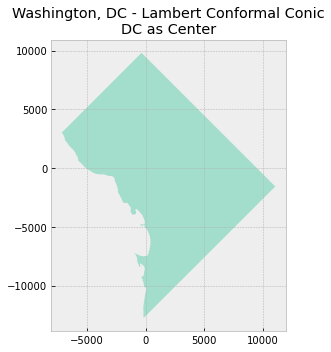

In [10]:
# Create a copy of the DC shapefile
dc_lcc_center = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point
dc_lcc_center = dc_lcc_center.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_center], "Washington, DC - Lambert Conformal Conic\nDC as Center")

As seen in the new map above, the values on both axes have changed. The origin `(0, 0)` is now in the center of DC.

#### Setting and exploring standard parallels

The [`PROJ.4` string for this projection](https://proj.org/operations/projections/lcc.html) has two additional parameters `lat_1` and `lat_2`, which specify the first and second parallel respectively. Recall that a conic projection "intersects" a globe at what is termed the standard parallels.

Here, we will set our two standard parallels at `38.850` and `39.950` as they fall within the DC boundaries.

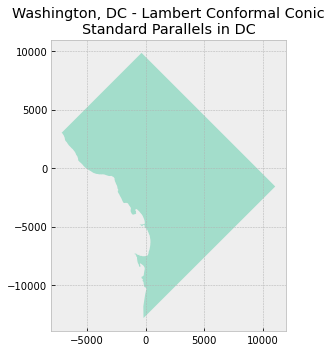

In [11]:
# Create a copy of the DC shapefile
dc_lcc_parallels_1 = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point and standard parallels
dc_lcc_parallels_1 = dc_lcc_parallels_1.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1], "Washington, DC - Lambert Conformal Conic\nStandard Parallels in DC")

Nothing really appears to be different; however, these values are important. Look what happens when we assign different values--ones that don't really make sense for mapping in DC--and compare the resulting DC map to the previous map.

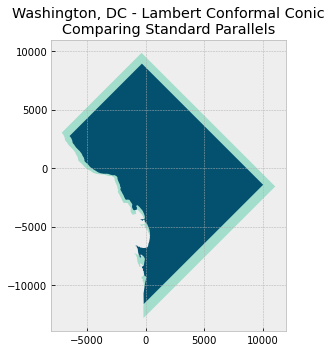

In [12]:
# Create a copy of the DC shapefile
dc_lcc_parallels_2 = dc.copy()

# # Reproject the data to Lambert Conformal Conic with specified center point and arbitrary standard parallels
dc_lcc_parallels_2 = dc_lcc_parallels_2.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=10 +lat_2=60 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1, dc_lcc_parallels_2], "Washington, DC - Lambert Conformal Conic\nComparing Standard Parallels")

It appears DC has shrunk! Of course, that's not the case in reality, but because map projections are inherently imperfect, choosing arbitrary parameters can make things worse. In this case, since the chosen standard parallels are relatively far from each other and from DC, all the data in between the standard parallels end up being compressed even more. For more information, check out this [Esri publication on map projections](https://giscourses.cfans.umn.edu/sites/giscourses.cfans.umn.edu/files/understanding_map_projections.pdf).

#### Setting false easting and false northing

Finally, two other parameters we can change are `+x_0` and `+y_0`, which are false easting and false northing respectively. The values assigned to these parameters simply offset the axes by the respective values; they do not change or affect the projection. False easting (with a value of 500,000 m) is used in Universal Tranverse Mercator (UTM) projections so that negative coordinates are avoided to the west of the central meridian in each zone. Similarly, false northing (with a value of 10,000,000 m) is also used to avoid negative coordinates when a UTM zone is in the southern hemisphere.

Let's set a false easting value of `500000` and a false northing value of `0`.

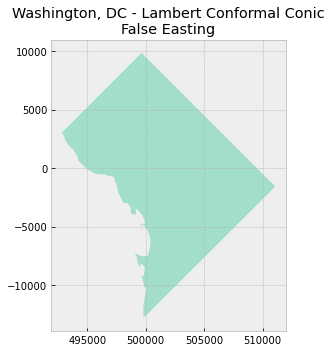

In [13]:
# Create a copy of the DC shapefile
dc_lcc_false_e = dc.copy()

# Reproject the data to Lambert Conformal Conic with specified center point, standard parallels, and false easting/northing
dc_lcc_false_e = dc_lcc_false_e.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +x_0=500000 +y_0=0 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_false_e], "Washington, DC - Lambert Conformal Conic\nFalse Easting")

Notice that the x-axis shifted to the left by 500,000 meters. The y-axis stayed the same because we did not use false northing. Now, the "origin" is `(500000, 0)`.

Source: [Universal Transverse Mercator system, Hunter College Department of Geography and Environmental Science](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/UTM%20and%20UPS.htm)

#### Comparing custom projection to Universal Tranverse Mercator

UTM is conformal. So let's compare our custom projection to UTM Zone 18N (in which DC falls).

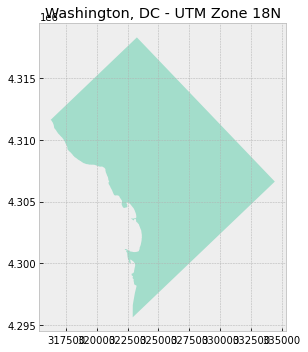

In [14]:
# Create a copy of the DC shapefile
dc_utm18n = dc.copy()

# Reproject the data to UTM Zone 18N
# Source: https://www.spatialreference.org/ref/epsg/wgs-84-utm-zone-18n/
dc_utm18n = dc_utm18n.to_crs("+proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Map reprojected DC shapefile
map_data([dc_utm18n], "Washington, DC - UTM Zone 18N")

Looks pretty much the same as our custom one!

Source: [Universal Transverse Mercator, Esri](https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/universal-transverse-mercator.htm)

## EPSG Codes

Many CRSs are assigned and can be referenced by an `EPSG` code, which consists of a four or five digit number. `EPSG` stands for the European Petroleum Survey Group, a now-defunct organization that compiled this CRS dataset. `EPSG` codes can be further explored with the [EPSG Geodetic Parameter Dataset](http://www.epsg-registry.org/) or at [SpatialReference.org](https://spatialreference.org/ref/epsg/).

Sources:
[Overview of Coordinate Reference Systems (CRS) in R, University of California, Santa Barbara](https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf); [Lesson 4. Understand EPSG, WKT and Other CRS Definition Styles, Leah Wasser](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/)

### Obtaining EPSG code from PROJ.4 string

Not all CRSs have a corresponding `EPSG` code, but we can find the `EPSG` code (if it exists) given a `PROJ.4` string. To do so, we can use the `to_espg()` function in the `pyproj` module.

In [15]:
# Import module
import pyproj

def get_epsg(proj4_string, min_confidence = 70):
    '''Function takes a PROJ.4 string and optional minimum confidence level as inputs and outputs the relevant EPSG code, if one exists. Source: https://geopandas.org/docs/user_guide/projections.html'''
    
    # Get relevant EPSG at the specified minimum confidence level
    return pyproj.CRS(proj4_string).to_epsg(min_confidence = min_confidence)


# Set variable to the PROJ.4 string of NAD83 / California zone 3
# Source: https://www.spatialreference.org/ref/epsg/26943/
proj4_full = "+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

# Call function to obtain relevant EPSG code
result = get_epsg(proj4_full)

# Print result
print("EPSG code for {}: {}.".format(proj4_full, result))

EPSG code for +proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs: 26943.


Success! In the example above, we were able to successfully obtain the `EPSG` code (in this case, `26943` for NAD83 / California zone 3) because it is exactly matched to the `PROJ.4` string. If we're missing some information in the `PROJ.4` string, however, we might not be able to get an exact `EPSG` code match.

In [16]:
# Set variable to the PROJ.4 string of NAD83 / California zone 3, with a few parameters missing
proj4_missing = "+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

# Call function to obtain relevant EPSG code
result_missing = get_epsg(proj4_missing)

# Print result
print("EPSG code for {}: {}.".format(proj4_missing, result_missing))

EPSG code for +proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs: None.


Source: [Managing Projections: Coordinate Reference Systems, GeoPandas](https://geopandas.org/docs/user_guide/projections.html)

#### Lowering minimum confidence parameter

We can lower the min_confidence parameter value in the `to_epsg()` function, which will cause the function to return an `EPSG` code that is the closest match to the provided `PROJ.4` string.

In [17]:
# Call function to obtain relevant EPSG code and lower the minimum confidence value
result_lower_confidence = get_epsg(proj4_missing, min_confidence = 20)

# Print result
print("EPSG code for {}: {}.".format(proj4_missing, result_lower_confidence))

EPSG code for +proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs: 26943.


Source: [Managing Projections: Coordinate Reference Systems, GeoPandas](https://geopandas.org/docs/user_guide/projections.html)

To get the `PROJ.4` string from an `EPSG` code, we can [use the `rasterio` module](https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html).





Sources: [Overview of Coordinate Reference Systems (CRS) in R, University of California, Santa Barbara](https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf); [Chapter 9: Coordinate Systems, Manuel Gimond](https://mgimond.github.io/Spatial/chp09-0.html); [Coordinate Systems: What's the Difference?, Esri](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/coordinate-systems-difference/); [Map projections, Henrikki Tenkanen](https://automating-gis-processes.github.io/CSC18/lessons/L2/projections.html); [Map projections, Henrikki Tenkanen & Vuokko Heikinheimo](https://autogis-site.readthedocs.io/en/stable/notebooks/L2/projections.html)